<a href="https://colab.research.google.com/github/myracheng/ACE/blob/master/new_ace_inaturalist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data in

In [0]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [0]:
!kaggle competitions download inaturalist-2019-fgvc6 -f train_val2019.tar.gz --force


  4% 3.20G/73.1G [01:03<25:24, 49.2MB/s]
User cancelled operation


In [0]:
!tar -xf /content/train_val2019.tar.gz


gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now


In [0]:
!rm train_val2019.tar.gz
!kaggle competitions download inaturalist-2019-fgvc6 -f train2019.json --force

 42% 5.00M/11.9M [00:01<00:01, 3.69MB/s]
100% 11.9M/11.9M [00:01<00:00, 8.51MB/s]


In [0]:
from zipfile import ZipFile 
file_name = "train2019.json.zip"
  
# # opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zipF: 
    # printing all the contents of the zip file 
    zipF.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    data = zipF.extract('train2019.json') 
    print('Done!')

File Name                                             Modified             Size
train2019.json                                 2019-12-16 01:40:12     59771647
Extracting all the files now...
Done!


In [0]:
cd ..

/content


In [0]:
ann_file = 'train2019.json'
with open(ann_file) as data_file:
        train_anns = json.load(data_file)
train_anns_df = pd.DataFrame(train_anns['annotations'])[['image_id','category_id']]
train_img_df = pd.DataFrame(train_anns['images'])[['id', 'file_name']].rename(columns={'id':'image_id'})
df_train_file_cat = pd.merge(train_img_df, train_anns_df, on='image_id')
df_train_file_cat['category_id']=df_train_file_cat['category_id'].astype(str)
df_train_file_cat.head()


,image_id,file_name,category_id
0,0,train_val2019/Plants/400/d1322d13ccd856eb4236c...,400
1,1,train_val2019/Plants/570/15edbc1e2ef000d8ace48...,570
2,2,train_val2019/Reptiles/167/c87a32e8927cbf4f06d...,167
3,3,train_val2019/Birds/254/9fcdd1d37e96d8fd94dfdc...,254
4,4,train_val2019/Plants/739/ffa06f951e99de9d220ae...,739


# Species Viz

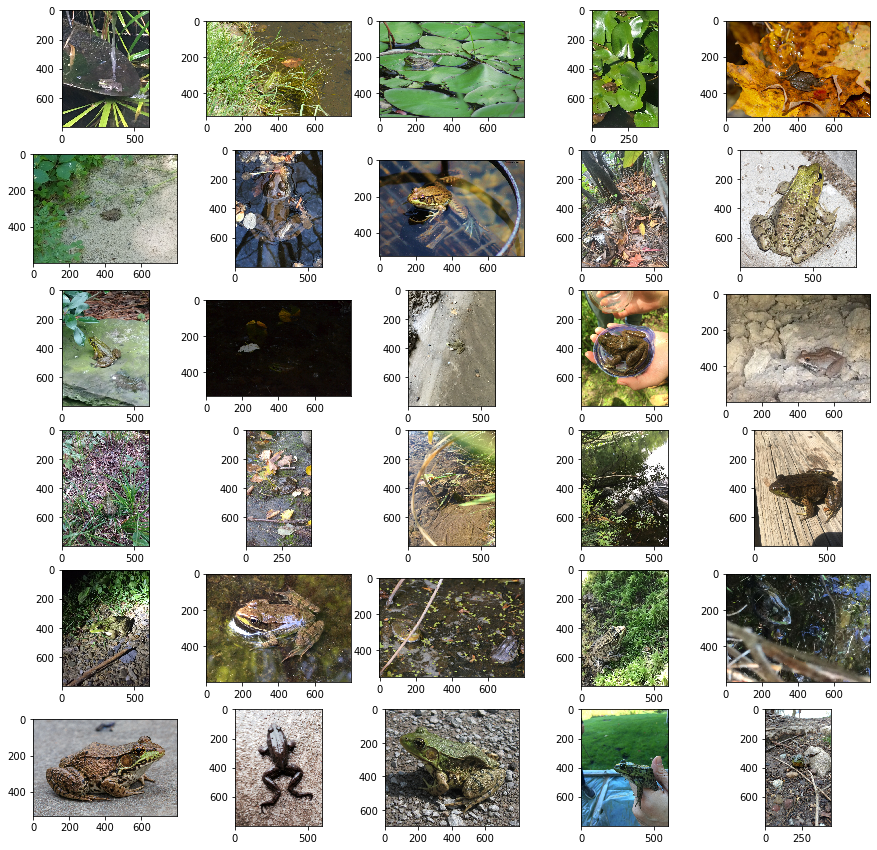

In [0]:
# Example of images for category_id = 153
img_names = df_train_file_cat[df_train_file_cat['category_id']=='155']['file_name'][:30]
# img_names
plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread("%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

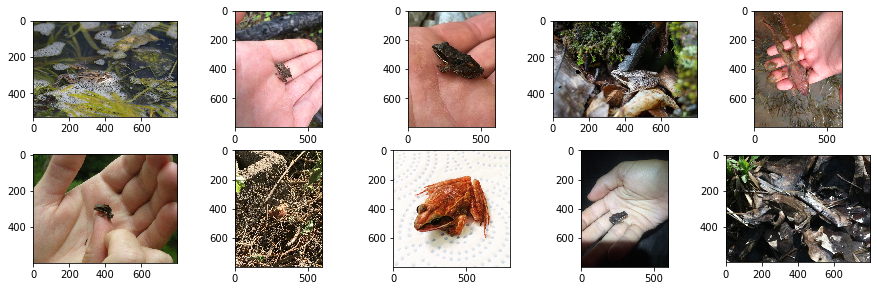

In [0]:
# Example of images for category_id = 153
img_names = df_train_file_cat[df_train_file_cat['category_id']=='160']['file_name'][:10]
# img_names
plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread("%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

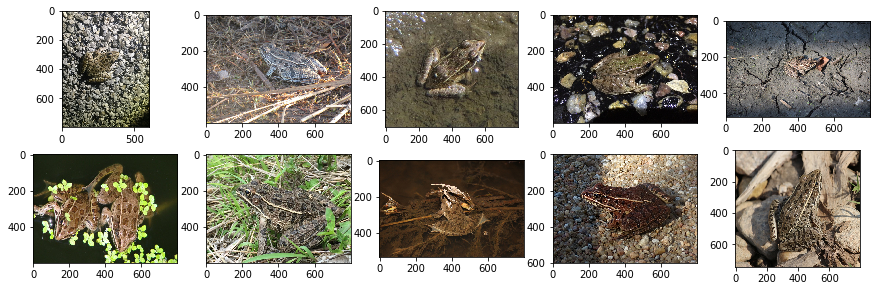

In [0]:
# Example of images for category_id = 153
img_names = df_train_file_cat[df_train_file_cat['category_id']=='162']['file_name'][:10]
# img_names
plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread("%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

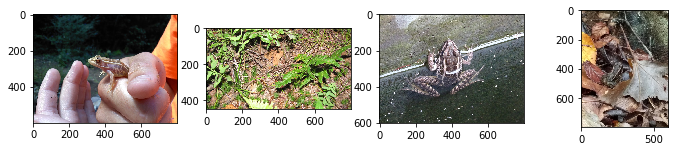

In [0]:
# Example of images for category_id = 153
img_names = df_train_file_cat[df_train_file_cat['category_id']=='159']['file_name'][:4]
# img_names
plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread("%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

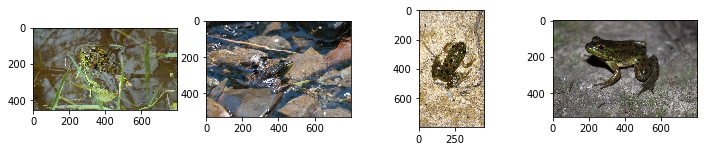

In [0]:
# Example of images for category_id = 153
img_names = df_train_file_cat[df_train_file_cat['category_id']=='157']['file_name'][:4]
# img_names
plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread("%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

# Load model

In [0]:
!pip install dropbox


     |████████████████████████████████| 552kB 2.7MB/s 


In [0]:
import dropbox
dbx = dropbox.Dropbox(access_token)

# response = dbx.files_list_folder("")

metadata, res = dbx.files_download('/iNat_2018_InceptionV3.pth.tar')

with open('iNat_2018_InceptionV3.pth.tar', "wb") as f:
  f.write(res.content)

  

In [0]:
import torch

In [0]:
the_model = torch.load('inat_model')

In [0]:
metadata, res = dbx.files_download('/inat_model')

with open('iNat_2018_InceptionV3.pth.tar', "wb") as f:
  f.write(res.content)
the_model = torch.load('inat_model')

FileNotFoundError: ignored

# Set up folders for ACE

In [0]:
folder_name = 'ace_source'

In [0]:
def absoluteFilePaths(directory):
  s = []
  for dirpath,_,filenames in os.walk(directory):
      for f in filenames:
      #  print(f)
        s.append(os.path.abspath(os.path.join(dirpath, f)))
  return s

In [0]:
s = absoluteFilePaths('train_val2019')

In [0]:
s = s[:4100]

In [0]:
# np.random.seed(93)
import shutil
num_imgs = 10  #todo 30
num_rand_exp = 2 #todo 20
inds = np.random.permutation(len(s))
if not os.path.isdir(folder_name):
  os.mkdir(folder_name)
  
for i in range(num_rand_exp):
  new_folder = folder_name + '/random%d_%d'%(500,i)
  if not os.path.isdir(new_folder):
    os.mkdir(new_folder)
  for j in range(num_imgs*i, num_imgs*(i+1)):
    shutil.copy(s[j], new_folder)

In [0]:
num_imgs = 20
for i in [5,154,134,158]:
  img_names = df_train_file_cat[df_train_file_cat['category_id']==str(i)]['file_name']
  new_folder = folder_name + '/' + str(i)
  if not os.path.isdir(new_folder):
    os.mkdir(new_folder)
  i = 1
  for img_name in img_names[:num_imgs]:
    try:
      shutil.copy(img_name, new_folder)
      i += 1
    except FileNotFoundError:
      continue


In [0]:
img_names = df_train_file_cat[df_train_file_cat['category_id']=='5']['file_name']
new_folder = folder_name + '/5'
print(img_names)
if not os.path.isdir(new_folder):
  os.mkdir(new_folder)
i = 1
for img_name in img_names[:10]:
    shutil.copy(img_name, new_folder)
    i += 1

324       train_val2019/Fungi/5/812cc2be1254f493b7056194...
559       train_val2019/Fungi/5/ecf2a5c4635e22ebf8d64687...
571       train_val2019/Fungi/5/500896a93e0253609b517bd1...
704       train_val2019/Fungi/5/176f46e42e98974087a69162...
1518      train_val2019/Fungi/5/c4b888323456ee1ec642f3d8...
                                ...                        
261572    train_val2019/Fungi/5/5e39a86c2b0cd365e0283181...
262264    train_val2019/Fungi/5/4e137cc4b5020596afee30df...
262367    train_val2019/Fungi/5/e8ccb3554838b2f3df1c0cf4...
264540    train_val2019/Fungi/5/d7d06909462e7cdf98cbb964...
264901    train_val2019/Fungi/5/2700753f36c5a9f7caa2947f...
Name: file_name, Length: 500, dtype: object


In [0]:
#fungi!
num_imgs = 50  #todo 20
img_names = df_train_file_cat[df_train_file_cat['category_id']=='136']['file_name']
new_folder = folder_name + '/136'
if not os.path.isdir(new_folder):
  os.mkdir(new_folder)
i = 1
for img_name in img_names:
    shutil.copy(img_name, new_folder)
    i += 1

In [0]:
# np.random.seed(94)

max_imgs = 10 #todo 40
inds = np.random.permutation(len(s))
new_folder = folder_name + '/random_discovery'
if not os.path.isdir(new_folder):
  os.makedirs(new_folder)
for j in range(max_imgs):
  shutil.copy(s[j], new_folder)

In [0]:
df_temp = df_train_file_cat['category_id'].apply(pd.to_numeric)
df_temp.head()

0    400
1    570
2    167
3    254
4    739
Name: category_id, dtype: int64

In [0]:
df_temp.values

array([400, 570, 167, ...,  70, 587, 287])

In [0]:
np.savetxt('img_labels.txt', df_temp.values,fmt='%d')

# ACE

In [0]:
!git clone https://github.com/myracheng/ACE.git

Cloning into 'ACE'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 110 (delta 12), reused 7 (delta 2), pack-reused 83
Receiving objects: 100% (110/110), 47.72 MiB | 10.37 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [0]:
!pip install tcav

In [0]:

#load model
metadata, res = dbx.files_download('/inat_model')

with open('inat_model', "wb") as f:
  f.write(res.content)
the_model = torch.load('inat_model')

In [0]:
!python3 ACE/ace_run.py --target_class 158 --source_dir ace_source --working_dir new_dir1 --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks fc --num_random_exp 2 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10






2020-02-29 18:58:24.970082: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-29 18:58:24.970319: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fc8c40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-29 18:58:24.970351: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-29 18:58:24.972034: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-29 18:58:24.973985: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-29 18:58:24.974023: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 10f4900822e6
2020-02-29 18:58:24.974032: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 10f4900822e6
2

In [0]:
!python3 ACE/ace_run.py --target_class 1 --source_dir ace_source --working_dir new_dir_7 --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks fc --num_random_exp 2 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10






2020-02-29 19:34:07.898385: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-29 19:34:07.900516: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x8a70c40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-29 19:34:07.900572: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-29 19:34:07.906779: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-29 19:34:07.950592: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-29 19:34:07.950663: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 10f4900822e6
2020-02-29 19:34:07.950675: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 10f4900822e6
2

In [0]:
!python3 ACE/ace_run.py --target_class 134 --source_dir ace_source --working_dir new_dir_134 --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks fc --num_random_exp 2 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10






2020-02-29 19:38:35.912539: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-29 19:38:35.912822: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x819cc40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-29 19:38:35.912857: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-29 19:38:35.914769: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-29 19:38:35.916944: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-29 19:38:35.916992: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 10f4900822e6
2020-02-29 19:38:35.917005: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 10f4900822e6
2

In [0]:
!python3 ACE/ace_run.py --target_class 158 --source_dir ace_source --working_dir new_dir_158 --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks fc --num_random_exp 2 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10






2020-02-29 19:39:17.995035: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-29 19:39:17.995265: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x77a8c40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-29 19:39:17.995299: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-29 19:39:17.997027: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-29 19:39:17.999093: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-29 19:39:17.999137: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 10f4900822e6
2020-02-29 19:39:17.999149: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 10f4900822e6
2

In [0]:
!python3 ACE/ace_run.py --target_class 5 --source_dir ace_source --working_dir new_dir_5 --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks Conv2d_2a_3x3,Mixed_5b,Mixed_7b,fc --num_random_exp 2 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10






2020-02-29 19:31:02.781409: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-29 19:31:02.782670: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x9128c40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-29 19:31:02.782707: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-29 19:31:02.787842: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-29 19:31:02.790094: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-29 19:31:02.790142: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 10f4900822e6
2020-02-29 19:31:02.790158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 10f4900822e6
2

In [0]:
!python3 ACE/ace_run.py --target_class 5 --source_dir ace_source --working_dir new_dir_7 --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks fc --num_random_exp 2 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10






2020-02-29 18:59:11.851987: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-29 18:59:11.852252: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x82fec40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-29 18:59:11.852285: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-29 18:59:11.854063: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-29 18:59:11.856243: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-29 18:59:11.856292: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 10f4900822e6
2020-02-29 18:59:11.856315: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 10f4900822e6
2

In [0]:
!python3 ACE/ace_run.py --target_class 5 --source_dir ace_source --working_dir new_dir_7_5 --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks Mixed_7b --num_random_exp 2 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10





2020-02-29 18:59:58.459225: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-29 18:59:58.459499: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7bc6c40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-29 18:59:58.459540: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-29 18:59:58.461323: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-29 18:59:58.463326: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-29 18:59:58.463366: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 10f4900822e6
2020-02-29 18:59:58.463376: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 10f4900822e6
20

In [0]:
!python3 ACE/ace_run.py --target_class 158 --source_dir ace_source --working_dir new_dir2 --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks Conv2d_2a_3x3 --num_random_exp 2 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10






2020-02-28 17:35:29.130416: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-28 17:35:29.130689: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7984c40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-28 17:35:29.130730: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-28 17:35:29.132798: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-28 17:35:29.135087: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-28 17:35:29.135152: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 638aa37c2560
2020-02-28 17:35:29.135183: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 638aa37c2560
2

In [0]:
pd.read_csv('new_dir/results_summaries/ace_results.txt')

,\t\t\t ---TCAV scores---
Mixed_7c:158_concept10:1.0,0.5
Mixed_7c:158_concept8:1.0,0.5
Mixed_7c:158_concept1:1.0,0.5
Mixed_7c:158_concept6:0.5,1.0
Mixed_7c:158_concept5:0.5,NaN
Mixed_7c:158_concept2:0.5,1.0
Mixed_7c:158_concept9:0.0,0.5
Mixed_7c:158_concept7:0.0,0.5
Mixed_7c:158_concept4:0.0,0.5
Mixed_7c:158_concept3:0.0,0.5


In [0]:
from imageio import imread,imwrite


In [0]:
imwrite('drive/My Drive/results.png', im)

In [0]:
!ls new_dir/results_summaries/ace_results.txt

ace_results.txt


In [0]:
pd.read_csv('new_dir/results_summaries/ace_results.txt')

,\t\t\t ---TCAV scores---
Mixed_7c:155_concept2:0.6,0.373901
Mixed_7c:155_concept1:0.4,0.177808


In [0]:
!ls /usr/local/lib/python3.6/dist-packages/torch/nn/modules

activation.py	dropout.py	  linear.pyi	     pooling.pyi
activation.pyi	dropout.pyi	  loss.py	     __pycache__
adaptive.py	flatten.py	  loss.pyi	     rnn.py
adaptive.pyi	flatten.pyi	  module.py	     rnn.pyi
batchnorm.py	fold.py		  module.pyi	     sparse.py
batchnorm.pyi	fold.pyi	  normalization.py   sparse.pyi
container.py	_functions.py	  normalization.pyi  transformer.py
container.pyi	__init__.py	  padding.py	     upsampling.py
conv.py		__init__.pyi	  padding.pyi	     upsampling.pyi
conv.pyi	instancenorm.py   pixelshuffle.py    utils.py
distance.py	instancenorm.pyi  pixelshuffle.pyi
distance.pyi	linear.py	  pooling.py


In [0]:
!python3 ACE/ace_run.py --target_class 155 --source_dir ace_source --working_dir seg10_dir --model_to_run iNat --model_path ACE/tensorflow_inception_graph.pb --labels_path img_labels.txt --bottlenecks Mixed_7c --num_random_exp 5 --max_imgs 20 --min_imgs 5 --num_parallel_workers 10






2020-02-24 17:09:32.611843: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-02-24 17:09:32.613691: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x87eac40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-02-24 17:09:32.613751: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-02-24 17:09:32.617794: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-02-24 17:09:32.620062: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-02-24 17:09:32.620145: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: 71d8314b8cb8
2020-02-24 17:09:32.620158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: 71d8314b8cb8
2

In [0]:
torch.__version__

'1.4.0'

In [0]:
import scipy

In [0]:
scipy.__version__

'1.4.1'

# TCAV

In [0]:
!git clone https://github.com/myracheng/tcav.git

fatal: destination path 'tcav' already exists and is not an empty directory.


In [0]:
cd tcav

/content/tcav


In [0]:
import cav as cav
import model as model
from tcav2 import TCAV as TCAV
import utils as utils
import utils_plot as utils_plot # utils_plot requires matplotlib
import os
import torch
import activation_generator as act_gen
import tensorflow as tf

In [0]:
working_dir = './tcav_class_test'
activation_dir =  working_dir + '/activations/'
cav_dir = working_dir + '/cavs/'
source_dir = "../ace_source"
bottlenecks = ['Mixed_5d', 'Conv2d_2a_3x3']
      
utils.make_dir_if_not_exists(activation_dir)
utils.make_dir_if_not_exists(working_dir)
utils.make_dir_if_not_exists(cav_dir)

# this is a regularizer penalty parameter for linear classifier to get CAVs. 
alphas = [0.1]   

target = '155'  
concepts = ['1']
random_counterpart = 'random500_1'

LABEL_PATH = '../img_labels.txt'

In [0]:
mymodel = model.InceptionV3Wrapper(LABEL_PATH,the_model)


In [0]:
act_generator = act_gen.ImageActivationGenerator(mymodel, source_dir, activation_dir, max_examples=100)


In [0]:
tf.logging.set_verbosity(0)

num_random_exp=2 # folders (random500_0, random500_1)

mytcav = TCAV(target,
                   concepts,
                   bottlenecks,
                   act_generator,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=num_random_exp)

results = mytcav.run()

Class = 155
  Concept = 1
    Bottleneck = Mixed_5d. TCAV Score = 0.60 (+- 0.04), random was 0.52 (+- 0.21). p-val = 0.735 (not significant)
    Bottleneck = Conv2d_2a_3x3. TCAV Score = 0.49 (+- 0.00), random was 0.47 (+- 0.03). p-val = 0.574 (not significant)


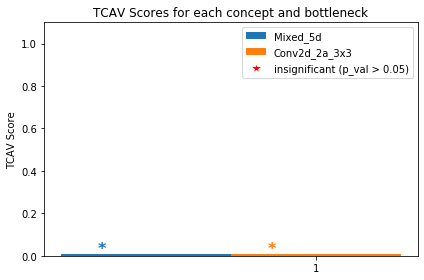

In [0]:
utils_plot.plot_results(results, num_random_exp=2)


In [0]:
import  tcav

In [0]:
img.shape

In [0]:
df_temp = df_train_file_cat['category_id'].apply(pd.to_numeric)
df_temp.head()
np.savetxt('img_labels.txt', df_temp.values,fmt='%d')

In [0]:
import tcav

mytcav = tcav.TCAV(sess,
                   target,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=2)


results = mytcav.run()

In [0]:
# !pip install tcav
!pip install -U PyYAML
!pip install tensorflow==2.0.0
!pip install keras==2.3.1

In [0]:
for name, child in v3.named_children():
  print(name)

Conv2d_1a_3x3
Conv2d_2a_3x3
Conv2d_2b_3x3
Conv2d_3b_1x1
Conv2d_4a_3x3
Mixed_5b
Mixed_5c
Mixed_5d
Mixed_6a
Mixed_6b
Mixed_6c
Mixed_6d
Mixed_6e
AuxLogits
Mixed_7a
Mixed_7b
Mixed_7c
fc


# DIY Patch Extraction

In [0]:
from multiprocessing import dummy as multiprocessing
import sys
import os
import numpy as np
from PIL import Image
import scipy.stats as stats
import skimage.segmentation as segmentation
import sklearn.cluster as cluster
import sklearn.metrics.pairwise as metrics
import tensorflow as tf
# from tcav import cav
from imageio import imread

In [0]:
pwd

'/content'

In [0]:

from os.path import join
from glob import glob

files = []
files.extend(glob(join("ace_source/1/", '*.jpg')))

In [0]:
from PIL import Image
import time



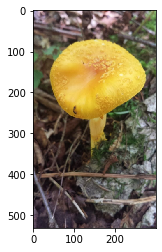

In [0]:
import cv2
ims = np.empty((len(files),299,299,3))
# print(files)
for i,f in enumerate(files):
# if i < 3:
  temp_im = imread(f)
  # plt.imshow(temp_im)
  # plt.figure()
  cool = temp_im.copy()
  # center_l = int(np.shape(temp_im)[0]/2)
  # center_w = int(np.shape(temp_im)[1]/2)
  ratio =  np.shape(temp_im)[1] /np.shape(temp_im)[0]
  if ratio > 1:
    t = cv2.resize(cool,(int(299*ratio),299))
    ims[i] =  t[:299,:299,:]
  else:
    ratio =  np.shape(temp_im)[0] /np.shape(temp_im)[1]
    t = cv2.resize(cool,(299,int(299*ratio)))
    # t = cool.resize(int(299*ratio),299,3)
    plt.imshow(t)
    ims[i] =  t[:299,:299,:]
  # plt.imshow( cool[center_l - 150:center_l +149, center_w - 150:center_w +149,:])
  # plt.figure()
  
  # ims[i] =  cool[center_l - 150:center_l +149, center_w - 150:center_w +149,:]

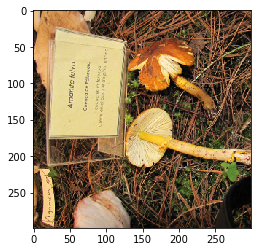

In [0]:
plt.imshow(ims[13,:,:,].astype(np.uint8))

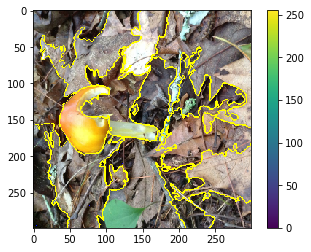

In [0]:
#visualize a single superpixel segmentation.
# higher compactness --> more square superpixels
# sigma: gaussian smoothing parameter
from multiprocessing import dummy as multiprocessing
import sys
import os
import numpy as np
from PIL import Image
import scipy.stats as stats
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import skimage.segmentation as segmentation
import sklearn.cluster as cluster
import sklearn.metrics.pairwise as metrics
import tensorflow as tf
# from tcav import cav
# 
x_trainnorm = ims
ind = 200
image_b = np.copy(x_trainnorm[ind:ind+1][0,:,:,:])


segments = segmentation.slic(image_b, n_segments=20, compactness=1000,
                sigma=1)
a = mark_boundaries(image_b, segments)[:,:,:]
idx=(a==1.0)
a[idx] *= np.max(image_b)
plt.imshow(a.astype(np.uint8))
plt.colorbar()

In [0]:
def create_patches(imgs):
    """Creates a set of image patches using superpixel methods.
    This method takes in the concept discovery images and transforms it to a
    dataset made of the patches of those images.
    """
    dataset, image_numbers, patches = [], [], []
    
    for fn, img in enumerate(imgs):
        image_superpixels = return_superpixels(img)
        for superpixel in image_superpixels:
            dataset.append(superpixel)
    #         patches.append(patch)
            image_numbers.append(fn)
    
    return np.array(dataset), np.array(image_numbers)

def return_superpixels(img):
    """Returns all patches for one image.
    Given an image, calculates superpixels for each of the parameter lists in
    param_dict and returns a set of unique superpixels by
    removing duplicates. If two patches have Jaccard similarity more than 0.5,
    they are concidered duplicates.
    Args:
      img: The input image
    """
    timestamp = str(time.time())[-3:]
    n_segmentss = [20]
    n_params = len(n_segmentss)
    compactnesses = [10]
    sigmas = [0]
    unique_masks = []
    for i in range(n_params):
      for j in range(len(compactnesses)):
        for k in range(len(sigmas)):
          param_masks = []
          segments = segmentation.slic(
                  img, n_segments=n_segmentss[i], compactness=compactnesses[j],
                  sigma=sigmas[k])
          for s in range(segments.max()):
              mask = (segments == s).astype(float)
              int_mask = (segments == s)
              # print(np.max(mask))
              if np.mean(mask) > 0.001 and np.max(img[int_mask]) > 0.5:
                  unique = True
                  for seen_mask in unique_masks:
                      jaccard = np.sum(seen_mask * mask) / np.sum((seen_mask + mask) > 0)
                      if jaccard > 0.5:
                          unique = False
                          break
                  if unique:
                      param_masks.append(mask)
          unique_masks.extend(param_masks)
    superpixels, patches = [], []

    i = 0
    while unique_masks:
        superpixel, patch = extract_patch(img, unique_masks.pop())
        im = Image.fromarray(superpixel.astype(np.uint8))
        im.save("patch%s_%d.jpg"%(timestamp,i))
        im = Image.fromarray(patch.astype(np.uint8))
        im.save("context%s_%d.jpg"%(timestamp,i))
        i+=1
        superpixels.append(superpixel)
        # patches.append(patch)
    return superpixels

def extract_patch(image, mask):
    """Extracts a patch out of an image.
    Args:
      image: The original image
      mask: The binary mask of the patch area
    Returns:
      image_resized: The resized patch such that its boundaries touches the
        image boundaries
      patch: The original patch. Rest of the image is padded with average value
    """
    mask_expanded = np.expand_dims(mask, -1)
    patch = (mask_expanded * image + (
        1 - mask_expanded) * float(117) / 255)
    ones = np.where(mask == 1)
    h1, h2, w1, w2 = ones[0].min(), ones[0].max(), ones[1].min(), ones[1].max()
    image = Image.fromarray((patch[h1:h2, w1:w2] * 255).astype(np.uint8))
    image_resized = np.array(image.resize([160,160],
                                          Image.BICUBIC)).astype(float) / 255
    return image_resized, patch

In [0]:
patches, im_nums = create_patches(x_trainnorm[:25])
print(len(patches))

143


In [0]:
= s

In [0]:
# acts = []
def run_examples(examples, bottleneck_name):

        global bn_activation
        bn_activation = None

        def save_activation_hook(mod, inp, out):
            global bn_activation
            bn_activation = out

        handle = v3._modules[bottleneck_name].register_forward_hook(save_activation_hook)

        # self.model.to(device)
        inputs = torch.FloatTensor(examples).permute(0, 3, 1, 2)
        v3.eval()
        v3(inputs)
        acts = bn_activation.detach().cpu().numpy()
        handle.remove()

        return acts

acts = run_examples(patches,'Mixed_5d')
    

In [0]:
np.shape(acts)

(66, 288, 17, 17)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
def cluster(acts, n_clusters):
    """Runs unsupervised clustering algorithm on concept actiavtations.
    Args:tt
      param_dict: Contains superpixl method's parameters. If an empty dict is
                 given, default parameters are used.
    Returns:
      asg: The cluster assignment label of each data points
      cost: The clustering cost of each data point
      centers: The cluster centers. For methods like Affinity Propagetion
      where they do not return a cluster center or a clustering cost, it
      calculates the medoid as the center  and returns distance to center as
      each data points clustering cost.
    Raises:
      ValueError: if the clustering method is invalid.
    """
    centers = None
    km = KMeans(n_clusters)
    d = km.fit(acts)
    centers = km.cluster_centers_
    d = np.linalg.norm(
      np.expand_dims(acts, 1) - np.expand_dims(centers, 0), ord=2, axis=-1)
    asg, cost = np.argmin(d, -1), np.min(d, -1)
    
    return asg, cost, centers

In [0]:
acts2 = np.reshape(acts,(len(acts),288*17*17))
asg, cost, centers  = cluster(acts2,10)
# acts2[0,:]

In [0]:
max_imgs=10
min_imgs=3
imgs = x_trainnorm[:50]
concept_number, concepts = 0, []
bn_dict = {}
bn_dict['concepts'] = []
for i in range(asg.max() + 1):
    label_idxs = np.where(asg == i)[0]
    if len(label_idxs) > min_imgs:
        concept_costs = cost[label_idxs]
        concept_idxs = label_idxs[np.argsort(concept_costs)]
        concept_image_numbers = set(im_numbers[label_idxs])
        print(len(concept_image_numbers))
        discovery_size = len(imgs)
        highly_common_concept = len(
          concept_image_numbers) > 0.5 * len(label_idxs)
        mildly_common_concept = len(
          concept_image_numbers) > 0.25 * len(label_idxs)
        mildly_populated_concept = len(
          concept_image_numbers) > 0.25 * discovery_size
        cond2 = mildly_populated_concept and mildly_common_concept
        non_common_concept = len(
          concept_image_numbers) > 0.1 * len(label_idxs)
        highly_populated_concept = len(
          concept_image_numbers) > 0.5 * discovery_size
        cond3 = non_common_concept and highly_populated_concept
        if highly_common_concept or cond2 or cond3:
          concept_number += 1
          concept = '{}_concept{}'.format('test', concept_number)
          bn_dict['concepts'].append(concept)
          bn_dict[concept] = {
              'images': dataset[concept_idxs],
              'patches': patches[concept_idxs],
              'image_numbers': im_numbers[concept_idxs]
          }
          bn_dict[concept + '_center'] = centers[i]

9
10
6


In [0]:
bn_dict['concepts']

['test_concept1', 'test_concept2']

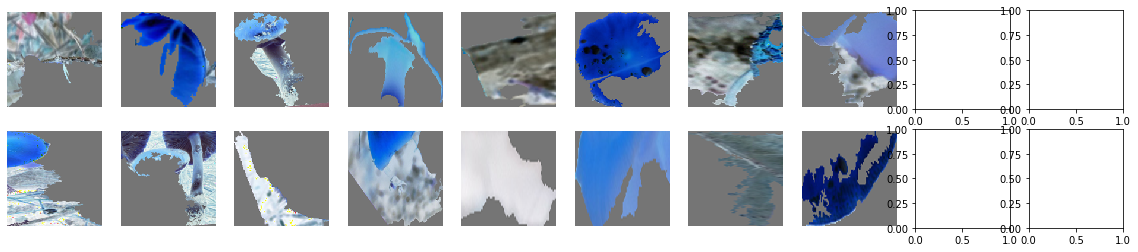

In [0]:
# border = 30
# print(len(labels))
f, axarr = plt.subplots(2,10,figsize=(20,4))
for i in range(8):
    axarr[0][i].axis('off')
    axarr[1][i].axis('off')
    axarr[0][i].imshow(bn_dict['test_concept1']['images'][i,:,:,:])

    axarr[1][i].imshow(bn_dict['test_concept2']['images'][i,:,:,:])
 

In [0]:
border = 30
# print(len(labels))
f, axarr = plt.subplots(2,10,figsize=(20,4))
for i in range(10):
  # for j in range(5):
    # if j == 0:
      # axarr[i][j].set_title(labels[i])
    
    axarr[0][i].axis('off')
    axarr[1][i].axis('off')
    axarr[0][i].imshow(bn_dict['test_concept4']['images'][i,:,:,0])

    axarr[1][i].imshow(bn_dict['test_concept2']['images'][i,:,:,0])
 

# New Section

In [0]:
pip install cStringIO

ERROR: Could not find a version that satisfies the requirement cStringIO (from versions: none)
ERROR: No matching distribution found for cStringIO


In [0]:
import urllib.request
import simplejson
from io import StringIO

fetcher = urllib.request.build_opener()
searchTerm = 'parrot'
startIndex = 0
searchUrl = "http://ajax.googleapis.com/ajax/services/search/images?v=1.0&q=" + str(searchTerm) + "&start=" + str(startIndex)
f = fetcher.open(searchUrl)
deserialized_output = simplejson.load(f)

In [0]:
deserialized_output

{'responseData': None,
 'responseDetails': 'This API is no longer available.',
 'responseStatus': 403}

In [0]:
imageUrl = deserialized_output['responseData']['results'][0]['unescapedUrl']
file = StringIO(urllib.urlopen(imageUrl).read())
img = Image.open(file)

TypeError: ignored

In [0]:
import selenium
# This is the path I use
# DRIVER_PATH = '.../Desktop/Scraping/chromedriver 2'
# Put the path for your ChromeDriver here
DRIVER_PATH = 'test'
wd = webdriver.Chrome(executable_path=DRIVER_PATH)

NameError: ignored

In [0]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.rg_ic")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.irc_mi')
            for actual_image in actual_images:
                if actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(1)
            load_more_button = wd.find_element_by_css_selector(".ksb")
            if load_more_button:
                wd.execute_script("document.querySelector('.ksb').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

NameError: ignored